Original size (in bytes): 1065000000
Compressed size (in bytes): 12162000


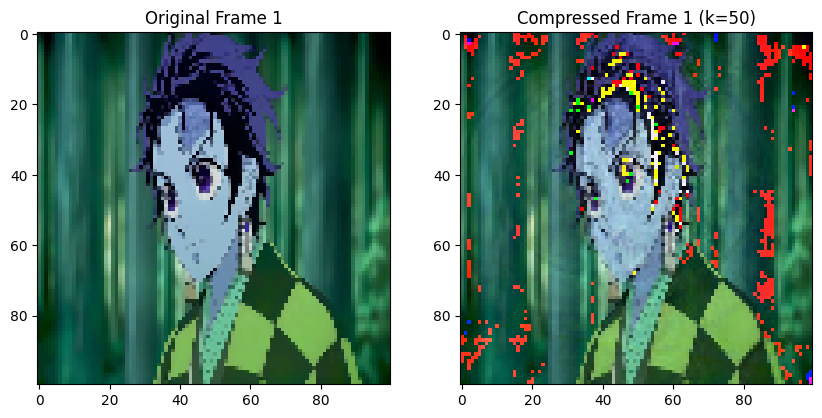

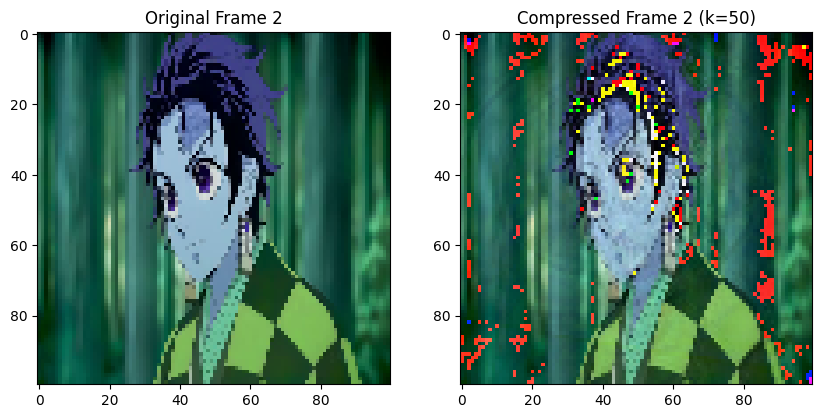

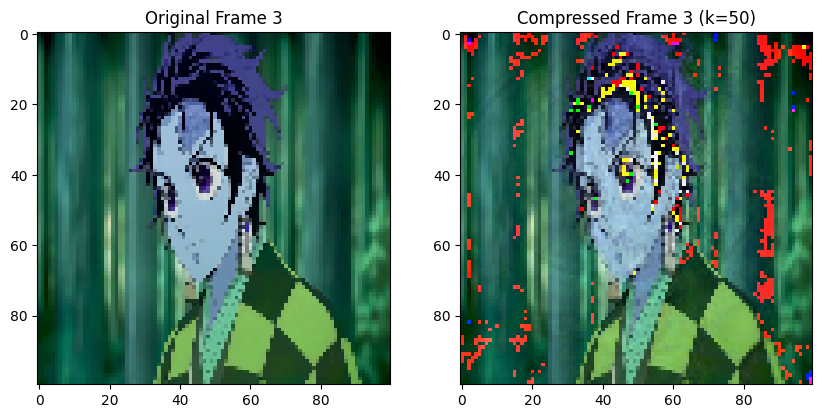

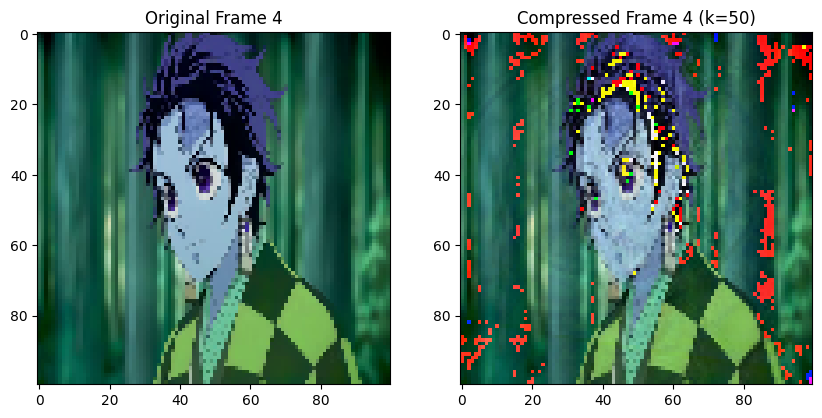

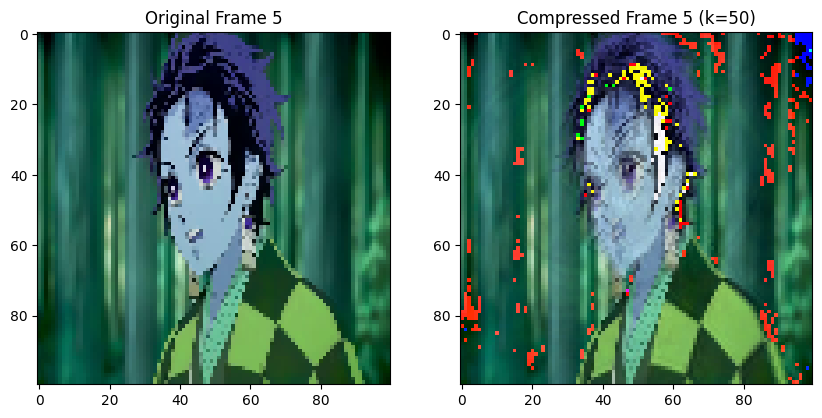

Singular values used: [281356.84266159  92899.26803548  66786.00004848  62210.17113886
  56601.43996164  49056.78671501  43833.57323092  37830.40839273
  31959.52447627  28764.0194036   26676.61525632  25681.42267517
  23056.38406976  21860.62659914  21489.70026135  20448.04271125
  20107.20851291  19009.67889611  17362.87792441  16637.08071911
  16060.18507667  15838.34573658  14871.47904638  14358.3457758
  14073.88994837  13854.46273704  13498.70342743  13056.48276082
  12284.82012828  11930.61204411  11874.35559343  11686.95321492
  11442.30980363  11194.84305026  10908.16950708  10123.9036507
   9982.23713331   9913.96860833   9758.88787842   9674.68955583
   9274.03598899   8901.38849318   8843.19889259   8798.99659366
   8568.66875589   8473.16415204   8428.45661153   8251.86655065
   8059.57614188   7930.29662317]


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to compress video using SVD
def svd_video_compression(video_path, k):
    # Load video
    cap = cv2.VideoCapture(video_path)
    frames = []

    # Read video frames
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Resize frame for processing if needed
        frame = cv2.resize(frame, (100, 100))
        frames.append(frame)

    cap.release()
    frames = np.array(frames)

    # Flatten frames into a single 2D matrix (flattening frames to columns)
    original_shape = frames.shape
    flattened_video = frames.reshape(original_shape[0], -1).astype(float)

    # Apply SVD on the flattened matrix
    U, S, VT = np.linalg.svd(flattened_video, full_matrices=False)

    # Reconstruct compressed video using only k singular values
    S_k = np.diag(S[:k])
    compressed_video = np.dot(U[:, :k], np.dot(S_k, VT[:k, :]))

    # Reshape back to video frame format
    compressed_video_frames = compressed_video.reshape(original_shape)

    return compressed_video_frames, original_shape, S[:k], frames  # Return frames as well

# Load, compress, and display the results
video_path = '/content/THIS IS 4K ANIME (Tanjiro Kamado).mp4'
k = 50  # Set the number of singular values to retain
compressed_video_frames, original_shape, singular_values_used, frames = svd_video_compression(video_path, k)

# Calculate original size in bytes
original_size = original_shape[0] * original_shape[1] * original_shape[2] * original_shape[2] * 3  # RGB channels
print(f"Original size (in bytes): {original_size}")

# Calculate compressed size
compressed_size = (U[:, :k].size + S_k.size + VT[:k, :].size) * 8  # 8 bytes per float
print(f"Compressed size (in bytes): {compressed_size}")

# Display the original vs. compressed frames for comparison
for i in range(5):  # Show 5 frames for visual comparison
    plt.figure(figsize=(10, 5))

    # Original frame
    plt.subplot(1, 2, 1)
    plt.imshow(frames[i].astype(np.uint8))
    plt.title(f'Original Frame {i+1}')

    # Compressed frame
    plt.subplot(1, 2, 2)
    plt.imshow(compressed_video_frames[i].astype(np.uint8))
    plt.title(f'Compressed Frame {i+1} (k={k})')

    plt.show()

print("Singular values used:", singular_values_used)
